# Tasty Bytes Recipe Site Traffic


In [12]:
-- Explore the data in the table
SELECT *
FROM 'recipe_site_traffic_2212.csv'

,column0,column1,column2,column3,column4,column5,column6,column7
0,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,001,NA,NA,NA,NA,Pork,6,High
2,002,35.48,38.56,0.66,0.92,Potato,4,High
3,003,914.28,42.68,3.09,2.88,Breakfast,1,NA
4,004,97.03,30.56,38.63,0.02,Beverages,4,High
...,...,...,...,...,...,...,...,...
943,943,1161,5.31,22.39,44.22,Lunch/Snacks,2,NA
944,944,NA,NA,NA,NA,Potato,2,High
945,945,951.74,29.42,3.57,13.87,Pork,2,High
946,946,266.61,35.77,0.97,8.07,Potato,6,High


In [13]:
# Start coding here...
# Importing required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


### Data Validation

In the first step, we **use the first row as column headers** and remove it from the data to **prevent duplication**. Next, we **replace missing value placeholders** (e.g., `NA`, `N/A`, `NULL`, `-`, and `''`) with `NaN` using NumPy. To **maintain data quality**, we drop rows containing **fewer than 5 non-null values**.  

Finally, we **fill missing values** in the `high_traffic` column with the label **"Not High"** to ensure consistency in the dataset.

In [14]:
# Cleaning the dataframe and using the first row as a header
df.columns = df.iloc[0]  
df = df[1:].reset_index(drop=True)
missing_values = ['NA', 'N/A', 'NULL', '-', '']
df = df.replace(missing_values, np.nan).dropna(thresh=5)
df['high_traffic'] = df['high_traffic'].fillna('Not High')
df.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,002,35.48,38.56,0.66,0.92,Potato,4,High
2,003,914.28,42.68,3.09,2.88,Breakfast,1,Not High
3,004,97.03,30.56,38.63,0.02,Beverages,4,High
4,005,27.05,1.85,0.8,0.53,Beverages,4,Not High
5,006,691.15,3.46,1.65,53.93,One Dish Meal,2,High


### Distribution of High Traffic Recipes 

The **histogram** illustrates the **distribution of website traffic** across recipes, providing insights into whether most recipes experience **high or low traffic**. The chart reveals that **a larger proportion of recipes** receive **high traffic** compared to those with low traffic, indicating that **popular recipes** make up a significant portion of the website's content. 

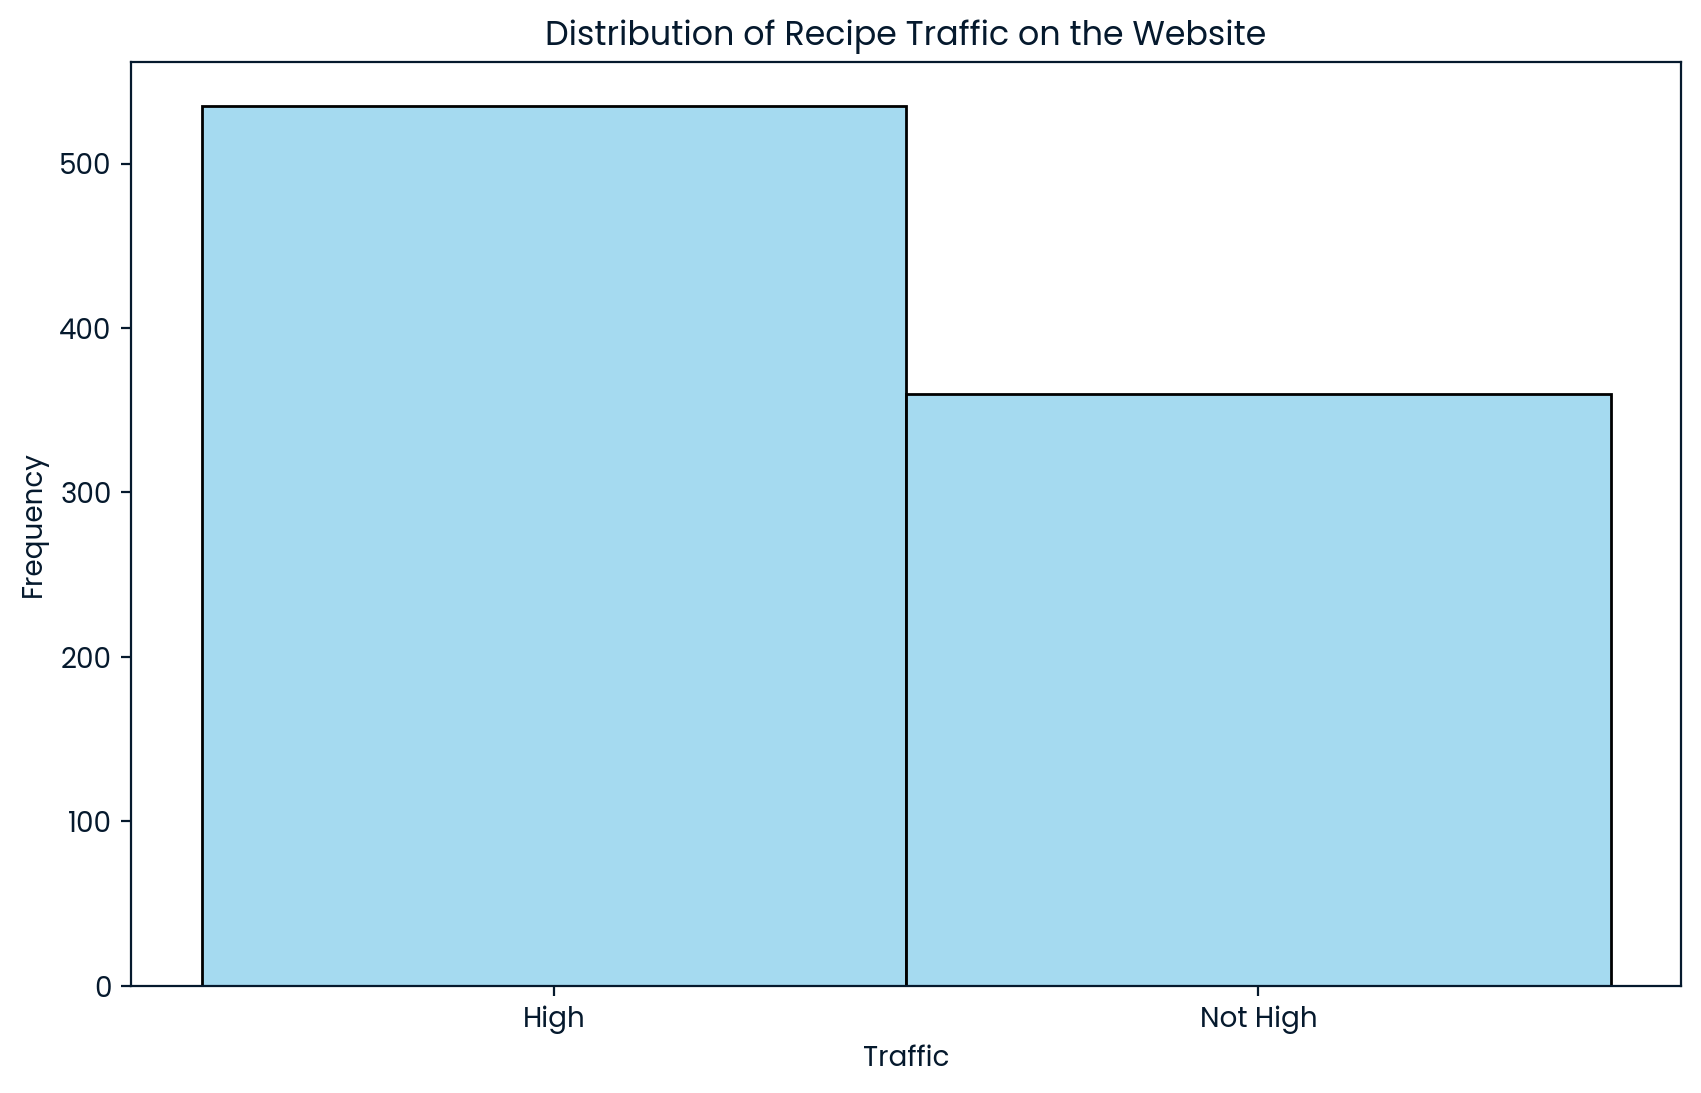

In [15]:
# Histogram for number of high traffic distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['high_traffic'], bins=10, color='skyblue')
plt.title('Distribution of Recipe Traffic on the Website')
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.show()

### Recipe Category Distribution

The **pie chart** displays the **proportion of recipes by category**, highlighting the **dominant categories** that may influence website traffic. The chart reveals a **fairly even distribution** across all categories, suggesting that **no single category overwhelmingly dominates** the recipe collection.

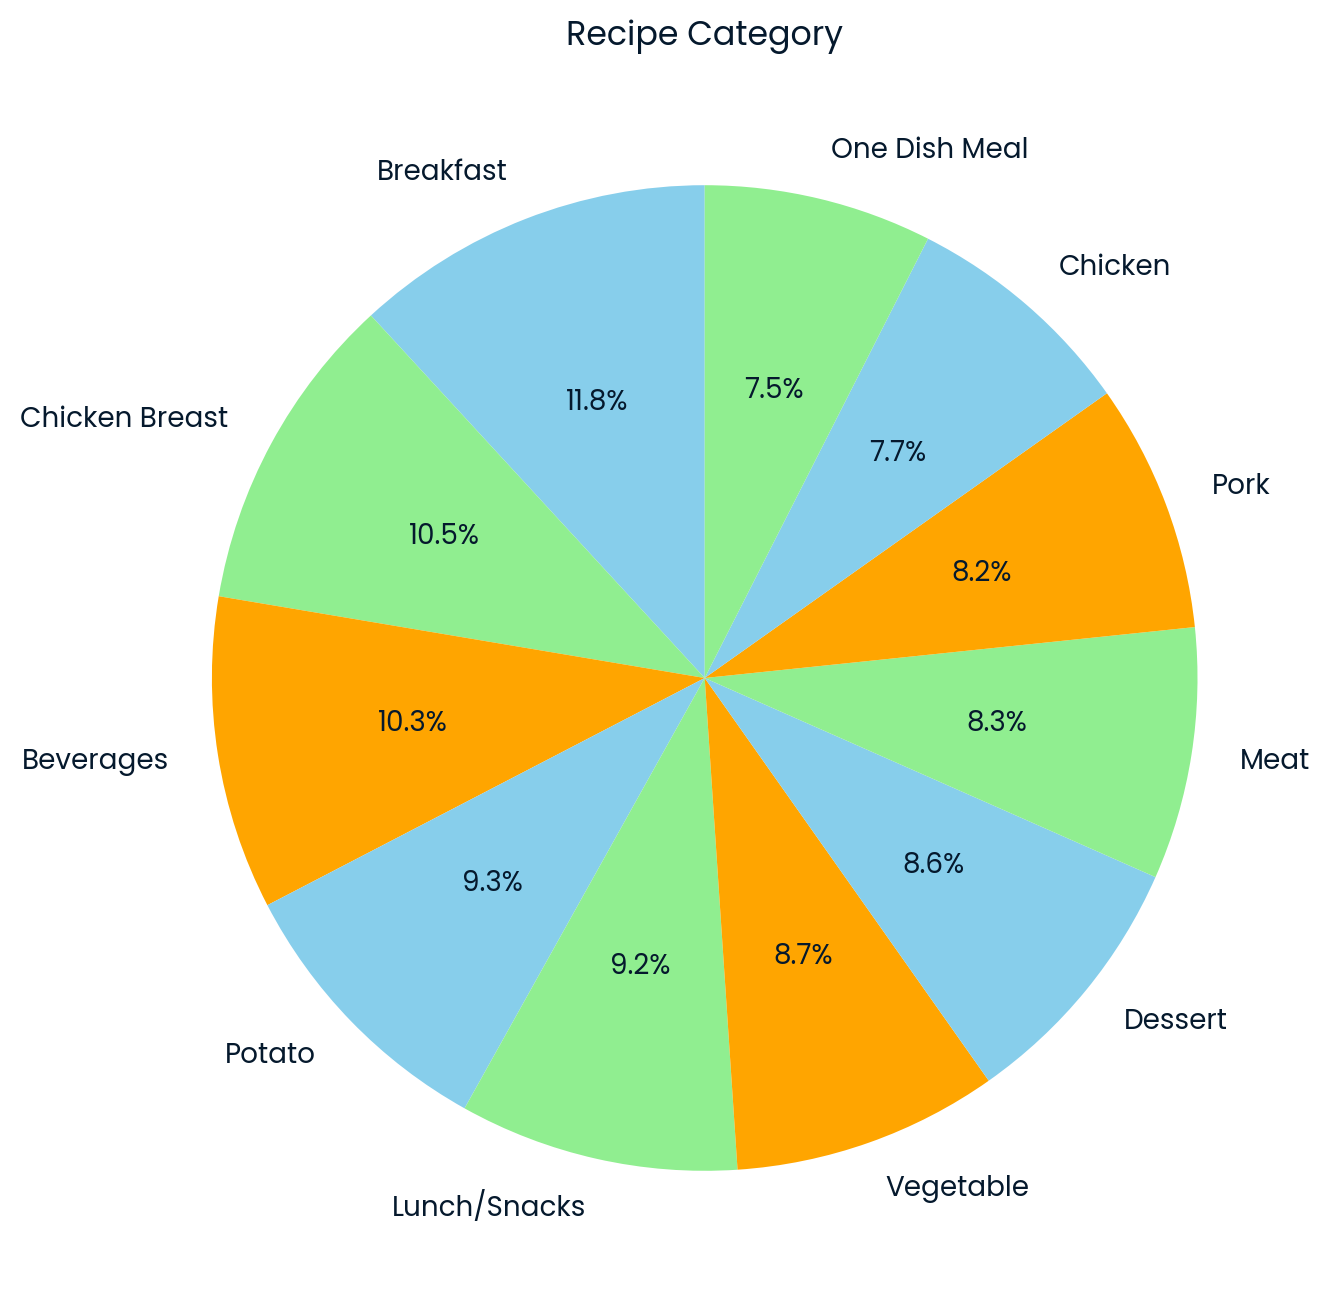

In [16]:
# Pie chart for category distribution
df['category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Recipe Category')
plt.ylabel('') 
plt.show()

### High Vs Not High Traffic Based on Category

The **stacked bar chart** illustrates the **distribution of high vs. not high traffic** across recipe categories. Each bar represents a category, with **two segments** showing the proportion of **high-traffic** and **not high-traffic** recipes. The chart reveals which categories tend to attract **more traffic**, helping identify **high-performing recipe types**. Categories with a **larger red segment (high traffic)** indicate stronger user engagement, while those with a **larger blue segment (not high traffic)** may require optimization or promotion.

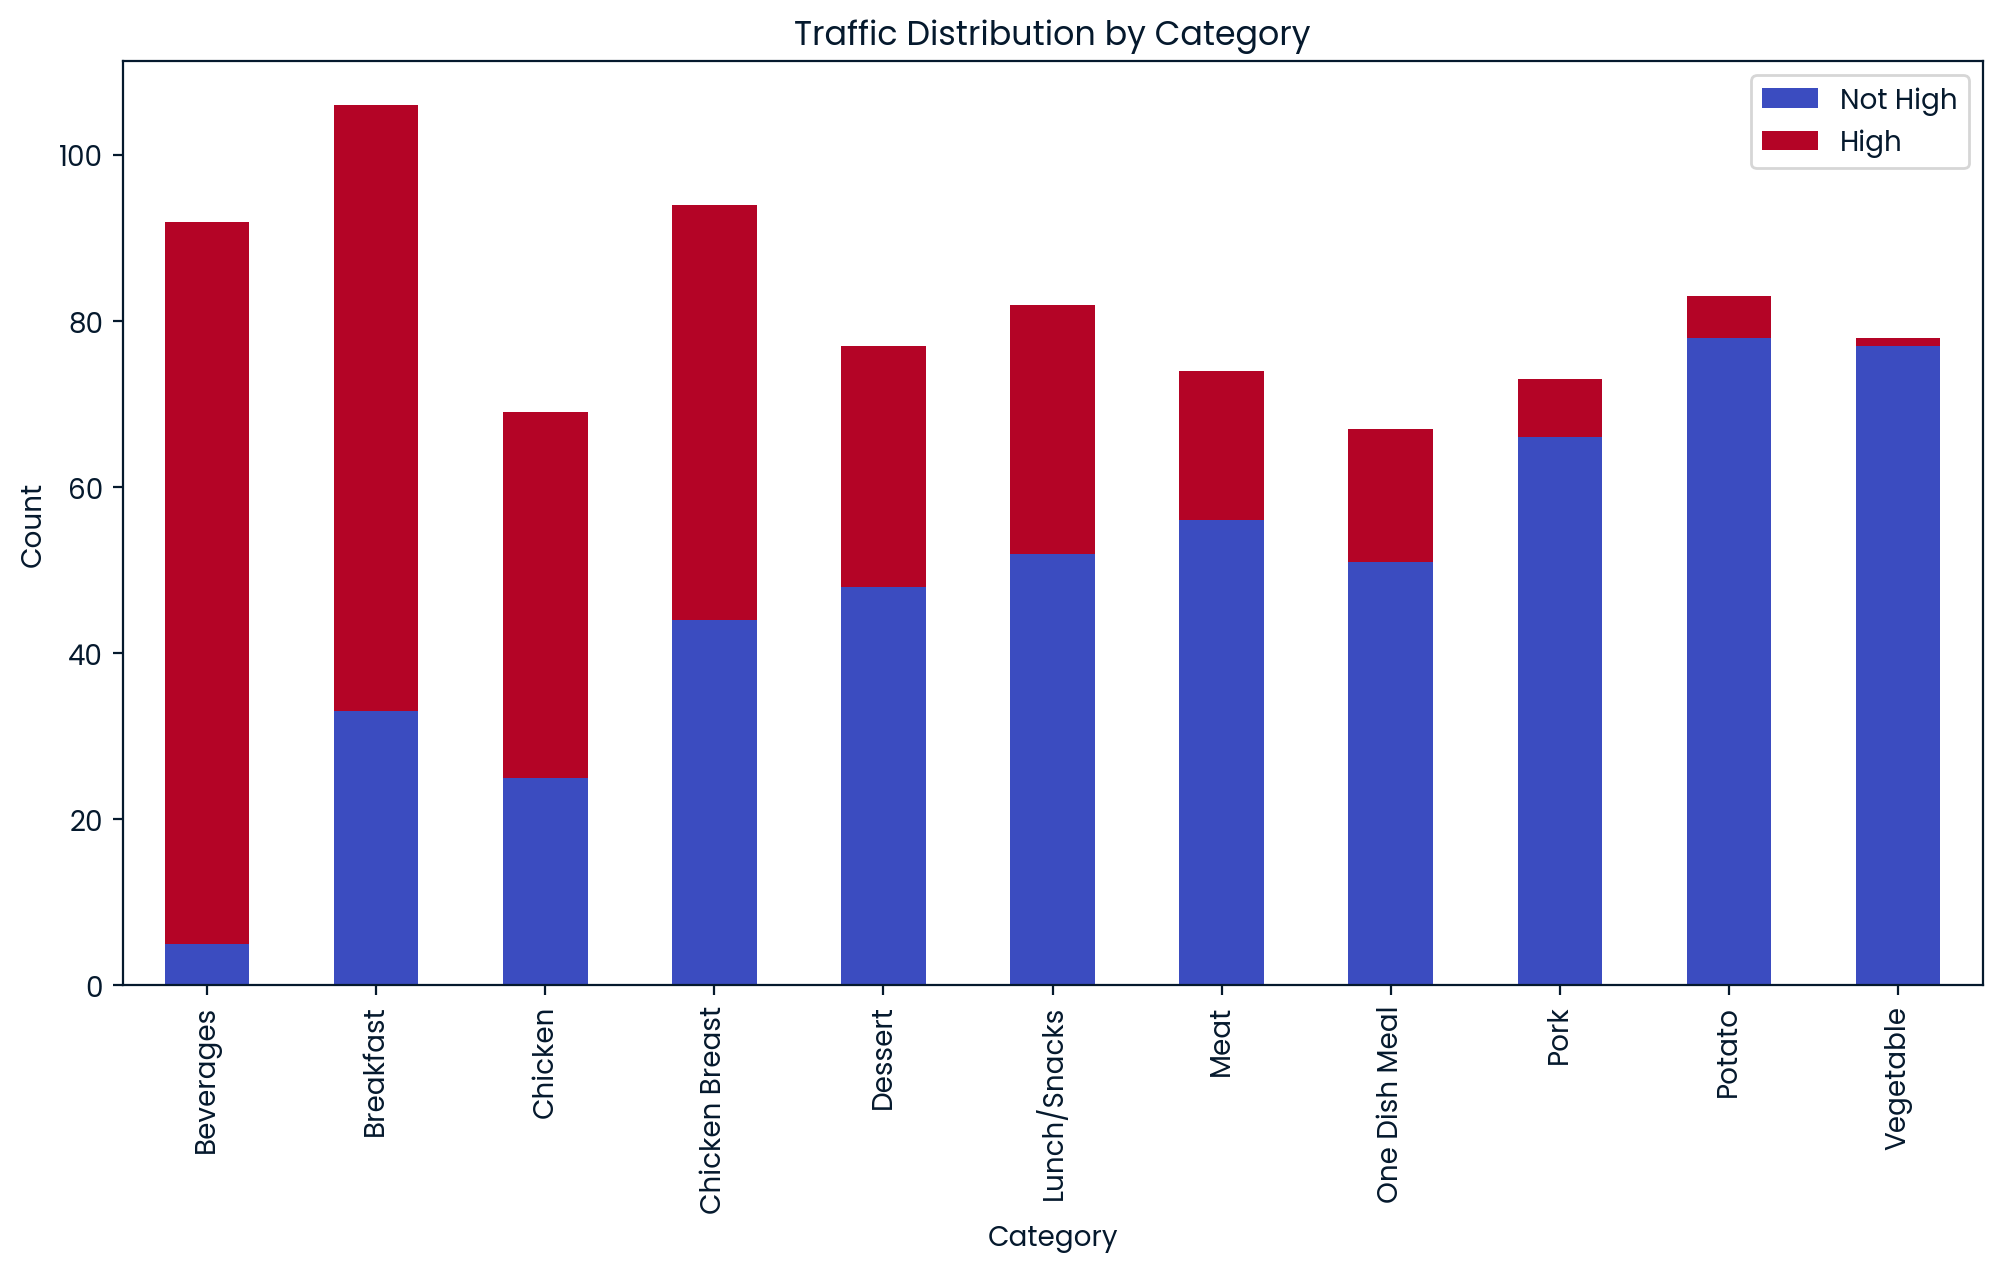

In [17]:
# Count of high and not high by category
category_traffic = df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)

# Plotting
category_traffic.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title('Traffic Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(['Not High', 'High'])
plt.show()

### Calories per Recipe Category

The **bar plot** illustrates the **relationship between recipe categories and their calorie content**, allowing for a clear comparison of **calorie variations** across categories. It highlights which categories tend to feature **higher-calorie recipes** and which ones typically contain **lower-calorie options**, offering insights into the **nutritional profile** of different recipe types.Also, calorie content does not strongly correlate with high traffic, suggesting that users may be influenced by other factors.

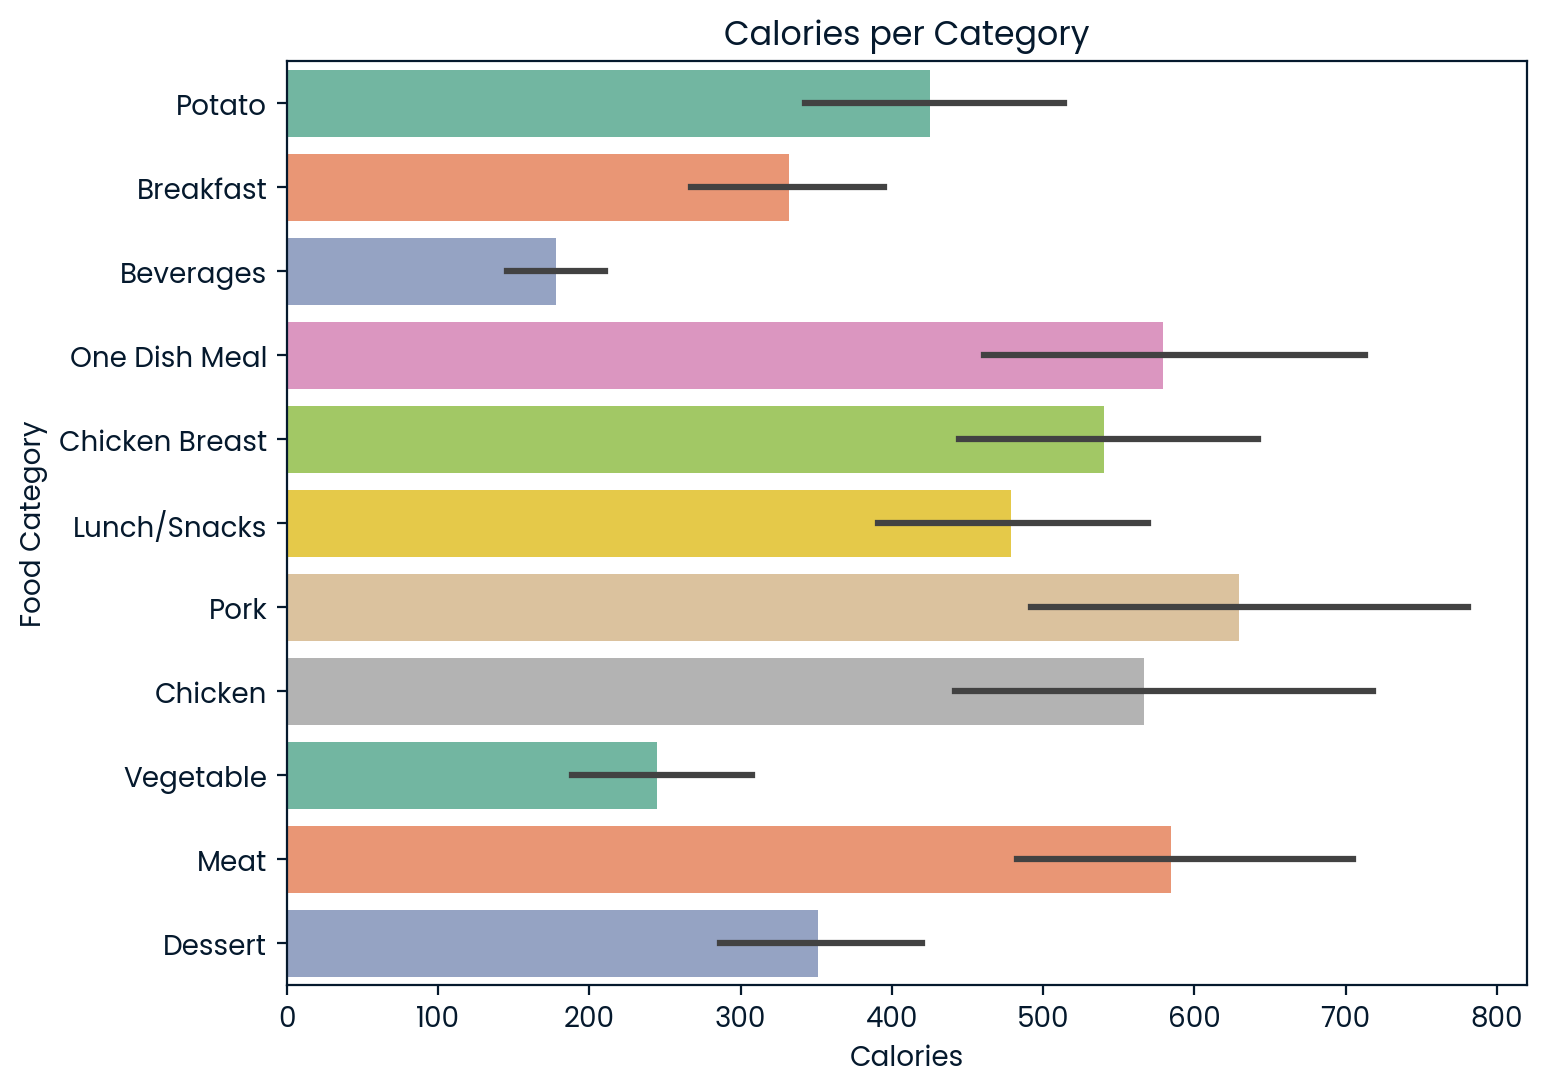

In [18]:
# Horizontal bar plot to show calories of the recipes based on the category
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='calories', y='category', palette='Set2')
plt.title("Calories per Category")
plt.xlabel("Calories")
plt.ylabel("Food Category")
plt.show()

### Model Development

**a) Problem Type Statement**

The task is a binary classification problem, where the goal is to predict whether a recipe will generate high traffic or low traffic based on various features (e.g., category, calories, etc.).

Target variable: high_traffic (binary: 1 for high, 0 for not high).

Features: All other columns, including category and calories.


**b) Reason for Model Selection**


Logistic Regression (Baseline Model):
Chosen as the baseline due to its simplicity and interpretability.
Suitable for binary classification problems.
Provides probabilistic outputs, making it useful for threshold-based decisions.

Support Vector Machine (SVM):
Chosen as a comparison model due to its ability to handle complex, non-linear relationships.
Uses kernel tricks to separate classes in higher-dimensional spaces.
GridSearchCV was used to tune hyperparameters, improving performance.

In [19]:
# Assuming 'traffic' is the target variable (categorical with values like 'high' and 'low')
label_encoder = LabelEncoder()
# Convert 'high_traffic' column into numeric (e.g., 0 for low, 1 for high)
df['high_traffic'] = label_encoder.fit_transform(df['high_traffic'])
df['high_traffic'] = 1 - df['high_traffic']  # Flip the encoding
df['category'] = label_encoder.fit_transform(df['category'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)

### Key Insights from Model Evaluation

**Accuracy:**
The Logistic Regression model achieved 77% accuracy, which is higher than the 59% accuracy of the SVM model.
Accuracy alone is not always the best metric, especially when class imbalance is present.

**Precision:**
Logistic Regression achieves a precision of 0.79, indicating that 79% of the recipes it labels as high-traffic are actually high-traffic.
The SVM model has a significantly lower precision of 0.59, meaning 41% of the recipes it predicts as high-traffic are false positives.
This could lead to less relevant recipes being promoted on the website, which may hurt customer experience.

**Recall:**
The SVM model achieved a perfect recall (1.00), meaning it correctly identified all high-traffic recipes.
However, the lower accuracy indicates it might be overfitting to the positive class.

**F1-Score:**
Logistic Regression has a slightly higher F1-score (0.81) compared to SVM (0.74), suggesting a better balance between precision and recall.

In [20]:
# Features and target
X = df.drop(columns=['recipe','high_traffic'])  # Drop the target column
y = df['high_traffic']  # Target variable (now encoded)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Logistic Regression model (baseline)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
# Predict on the test set
y_pred_log = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)


# SVM with GridSearchCV
svm_model = SVC()
# Hyperparameters to tune
svm_params = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']
}
# Grid search
grid_svm = GridSearchCV(svm_model, svm_params, cv=5, scoring='recall', n_jobs=-1)
grid_svm.fit(X_train, y_train)
# Predictions
y_pred_svm = grid_svm.best_estimator_.predict(X_test)

# Create a dictionary with performance metrics
metrics = {
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm)
    ],
        'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_svm)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_svm)
    ]

}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
# Display the performance table
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.770950,0.792793,0.830189,0.81106
1,SVM,0.592179,0.592179,1.000000,0.74386


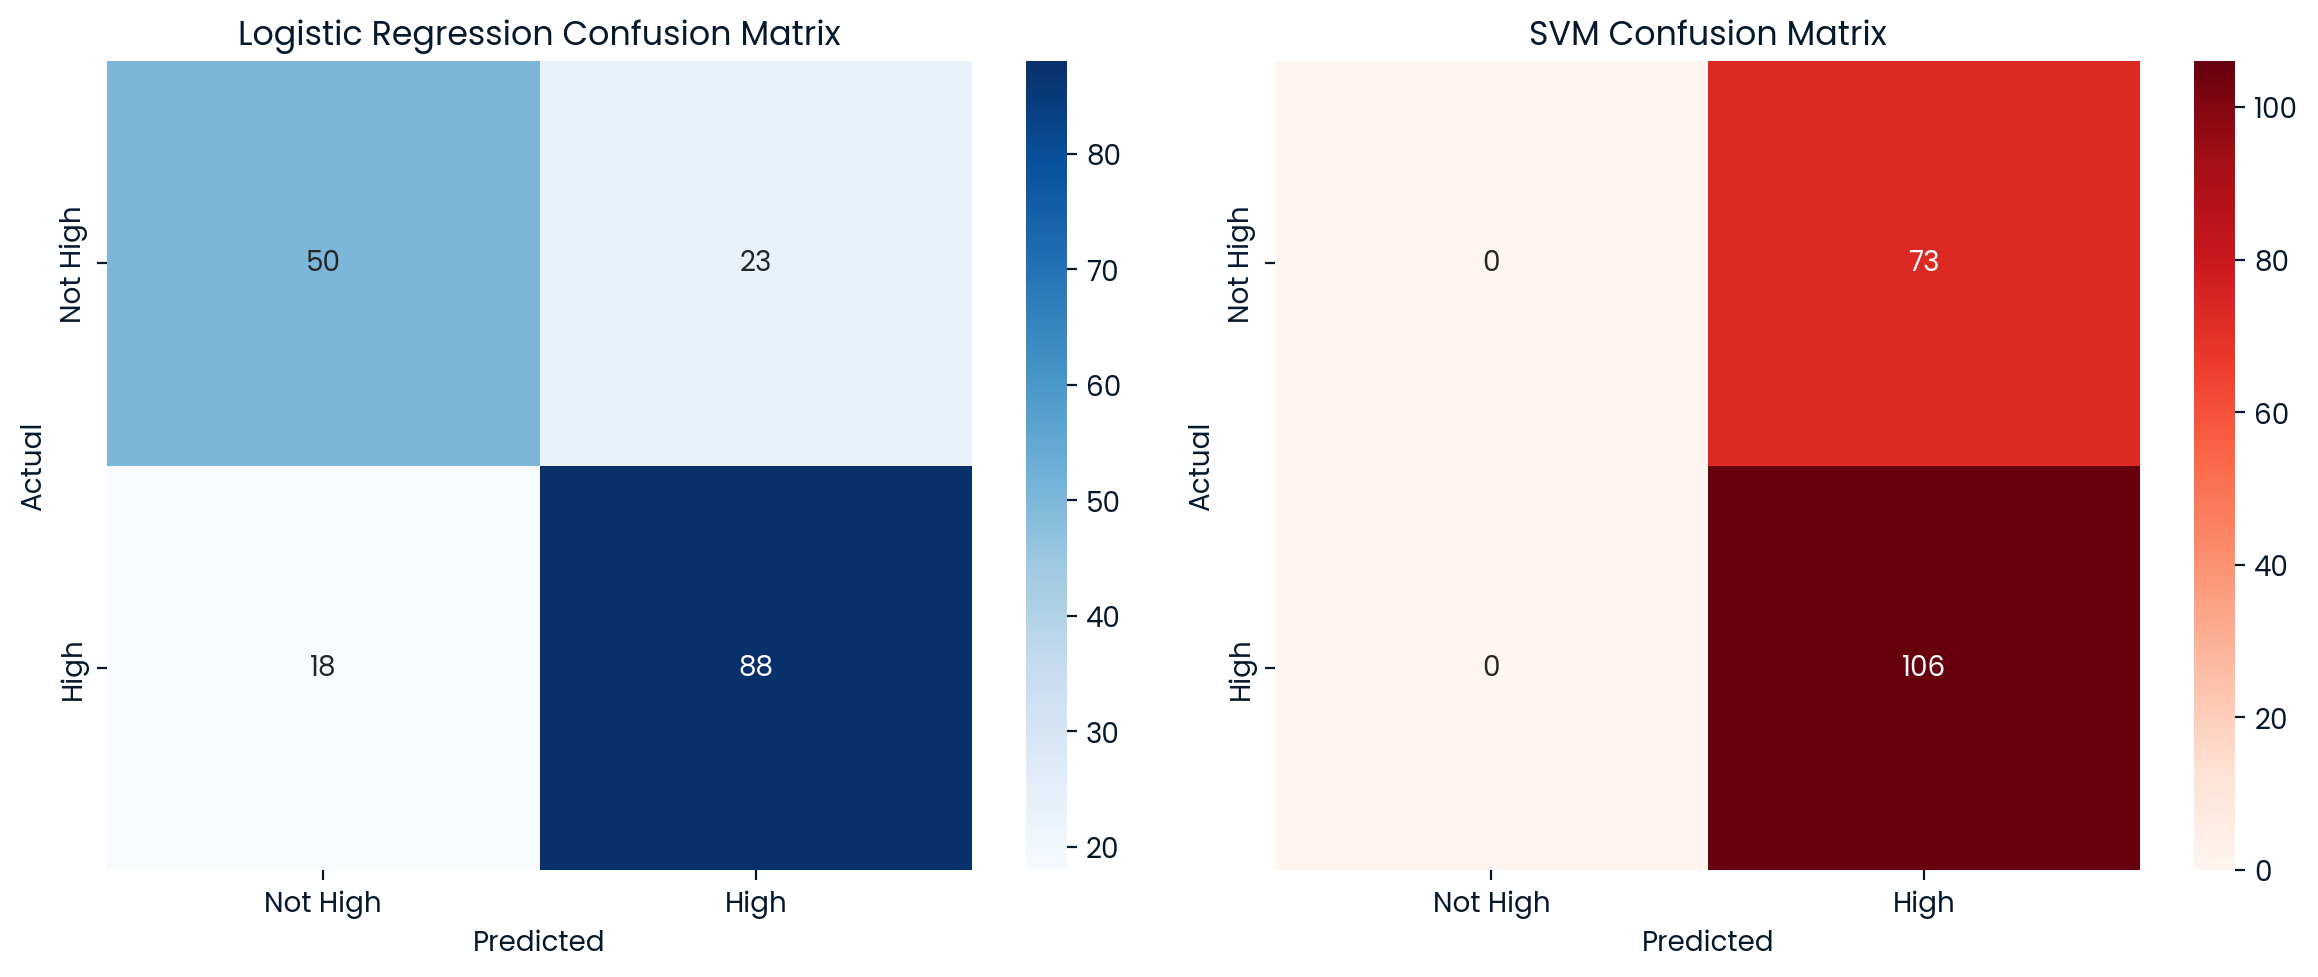

In [23]:
from sklearn.metrics import confusion_matrix

# logistic regression confusion matrix
log_cm = confusion_matrix(y_test, y_pred_log)

# SVM confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)


# Plotting both matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for logistic regression
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High', 'High'], 
            yticklabels=['Not High', 'High'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Logistic Regression Confusion Matrix')

# Heatmap for SVM
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not High', 'High'], 
            yticklabels=['Not High', 'High'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

### **Business Metrics and Comparison**

**False Positives (FP):**  
Recipes incorrectly classified as high traffic. This could result in displaying low-performing recipes on the homepage, reducing customer engagement.  
- **Logistic Regression:** 18 FP  
- **SVM:** 0 FP  

**False Negatives (FN):**  
Recipes incorrectly classified as low traffic. Missing out on promoting a high-performing recipe could reduce potential traffic and revenue.  
- **Logistic Regression:** 23 FN  
- **SVM:** 73 FN  

**True Positives (TP):**  
Recipes that are truly high traffic and correctly classified as high traffic.  
- **Logistic Regression:** 50 TP  
- **SVM:** 0 TP  

**True Negatives (TN):**  
Recipes that are truly low traffic and correctly classified as low traffic.  
- **Logistic Regression:** 88 TN  
- **SVM:** 106 TN  

---


### **Key Insights:**
- The **SVM model** is overly biased toward predicting recipes as **low traffic**, leading to **zero true positives** and **high false negatives** (73).  
- The **Logistic Regression model** has a more balanced classification but still misclassifies some recipes.  
- **SVM's behavior may be due to class imbalance** or a poorly tuned model, which should be investigated further.  






## Summary 

**Logistic Regression:**
Higher overall accuracy (77%).
Balanced recall and precision with a solid F1-score (81%).
More reliable for general-purpose classification.

**SVM with GridSearchCV:**
Perfect recall (100%) ensures no high-traffic recipes are missed.
Lower accuracy, indicating overfitting or poor handling of class imbalance.
Better for scenarios where missing a high-traffic recipe is costly.


## Recommendations

**Model Selection:**

Based on the Precision, F1-score and accuracy, Logistic Regression is the better option for general performance.
If recall (catching all high-traffic recipes) is the main priority, SVM might be preferable, but you should be cautious of its lower accuracy and potential false positives.


**Business Actions:**

- Use the Logistic Regression model for production deployment due to its balanced performance.
- Regularly retrain the model with new data to prevent concept drift.
- Monitor recall and precision to avoid displaying low-performing recipes.
- Collect additional features such as user engagement time or recipe reviews to improve model performance.
